#### Aline Rockenzahn 
#### Jueves 12 Septiembre 2024 

# <div align ="center"> T04-PROGRAMACIÓN LINEAL

En un notebook de Jupyter resuelve todos los problemas de programación lineal de: 
- 02 Programación lineal.ipynb
- A05
- A06
  
El planteamiento del problema debe ser claro y en Markdown; la solución debe ser encontrada con linprog. 

**02 PROGRAMACIÓN LINEAL EJEMPLO 1**

Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B. El producto A contiene 30% de proteínas, un 1% de grasas, y un 10% de azúcares. El producto B contiente un 5% de proteína, un 7% de grasas, y un 10% de azúcares. 

El compuesto debe de tener, al menos, 25g de proteínas 6g de grasas, y 30g de azúcares. El coste del producto A es de 0.6 u.m./g y el de B es de 0.2 u.m./g.   
Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

1. ¿Qué quiero hacer? Minimizar el costo
2. ¿Sobre qué puedo influir? Cantidad de gramos de A y de B
3. Funcion de costo
$$f(X_A, X_B) = 0.6X_A + 0.2X_B $$
4. RESTRICCIONES
$$0.3X_A + 0.05X_B \geq 25g $$
$$0.01X_A + 0.07X_B \geq 6g $$
$$0.1X_A + 0.10X_B \geq 30g $$
5. Asegurarme que el probblema sea de minimización
$$-0.3X_A - 0.05X_B \leq -25g $$
$$-0.01X_A - 0.07X_B \leq -6g $$
$$-0.1X_A - 0.10X_B \leq -30g $$ 

Ahora resumiendo todo el problema: 
Ahora resumiendo todo el problema: 
$$\min_{X_A, X_B} 0.6X_A + 0.2X_B$$
<div align ="center">s.t.
$$-0.3X_A - 0.05X_B \leq -25g $$
$$-0.01X_A - 0.07X_B \leq -6g $$
$$-0.1X_A - 0.10X_B \leq -30g $$ 

In [23]:
import numpy as np 
c3= np.array([0.6,0.2])
#X_A, X_B 

Aub3= np.array([
    [-0.30, -0.05],
    [-0.01, -0.07],
    [-0.10, -0.10]
])

bub3 = np.array([-25,-6,-30])
import scipy.optimize as opt 
#opt.linprog? Esto es para preguntar sobre una función 

sol3 = opt.linprog(c3,Aub3,bub3) #c son los coeficintes de la función de costo, Aub son coeficientes de las restriciones, bub son restricciones
sol3 

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 76.0
              x: [ 4.000e+01  2.600e+02]
            nit: 2
          lower:  residual: [ 4.000e+01  2.600e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.260e+01  0.000e+00]
                 marginals: [-1.600e+00 -0.000e+00 -1.200e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [25]:
sol3.x 

array([ 40., 260.])

In [27]:
Aub3 @ sol3.x

array([-25. , -18.6, -30. ])

Interpretando los resultados de arriba:   
**El costo mínimo para generar el producto es de:** 76 u.m   
**Los gramos de X_A que se deben utilizar son:** 40g    
**Los gramos de X_B que se deben utilizar son:** 260g     
**Los gramos totales de proteína son:** 25g  
**Los gramos totales de grasa son:** 18.6g  
**Los gramos totales de azúcares son:** 30g   

**02 PROGRAMACIÓN LINEAL EJEMPLO 2**

Una fábrica de carrocerías de automóviles y camiones tiene dos naves.
- En la nave A, para hacer la carrocería de un camión, se invierten siete días-operario, para fabricar la de un coche se precisan dos días-operario.
- En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de 300 días operario, y la nave B de 270 días-operario. 

Si los beneficios que se obtienen por cada camión son de 600 u.m.  por cada automóvil 200 u.m. , ¿cuántas unidades de cada uno se deben producir para maximizar las ganancias?  

1. ¿Qué quiero hacer? Maximizar la ganancia
2. ¿Sobre qué puedo influir? sobre la cantidad de caiones y carros hace A y cuántos camiones y carros hace B
3. Función de costo
$$ f(a_A, c_A, a_B, c_B) = 200a_A + 600c_A +200a_B + 300c_B $$
4. RESTRICCIONES
$$ 2a_A + 7c_A \leq 300$$
$$ 3a_B + 3 c_B \leq 270$$
5. Asegurarme que la función sea min
$$ f(a_A, c_A, a_B, c_B) = -200a_A -600c_A -200a_B - 300c_B $$

Ahora resumiendo todo el problema: 
Ahora resumiendo todo el problema: 
$$\min_{a_A, c_A, a_B, c_B} -200a_A -600c_A -200a_B - 300c_B $$
<div align ="center">s.t.
$$ 2a_A + 7c_A \leq 300$$
$$ 3a_B + 3 c_B \leq 270$$

In [51]:
import numpy as np 
c4= np.array([-200,-600, -200, -300])
#a_A, c_A, a_B, c_B

Aub4= np.array([
    [2, 7, 0, 0],
    [0, 0, 3, 3],
])

bub4 = np.array([300,270])
import scipy.optimize as opt 

sol4 = opt.linprog(c4,Aub4,bub4) #c son los coeficintes de la función de costo, Aub son coeficientes de las restriciones, bub son restricciones
sol4 

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -57000.0
              x: [ 1.500e+02  0.000e+00  0.000e+00  9.000e+01]
            nit: 0
          lower:  residual: [ 1.500e+02  0.000e+00  0.000e+00  9.000e+01]
                 marginals: [ 0.000e+00  1.000e+02  1.000e+02  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.000e+02 -1.000e+02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [47]:
sol4.x

array([150.,   0.,   0.,  90.])

In [49]:
Aub4 @ sol4.x 

array([300., 270.])

Interpretando los resultados de arriba:   
**La ganancia máxima producida es de:** 57,000   
**Los automóviles producidos en A son:** 150  
**Los camiones producidos en A son:** 0   
**Los automóviles producidos en B son:** 0   
**Los camiones producidos en B son:** 90   
**La nave A trabaja:** 300 días   
**La nave B trabaja:** 270 días   


# <div align ="center"> A05-PROGRAMACIÓN LINEAL

**Ejercicio 1**

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en 100 gramos, se deben tener por lo menos 9 gramos de proteína y 7 gramos de grasa. Así mismo, no se debe tener más de 2.5 gramos de fibra y 0.5 gramos de sal.

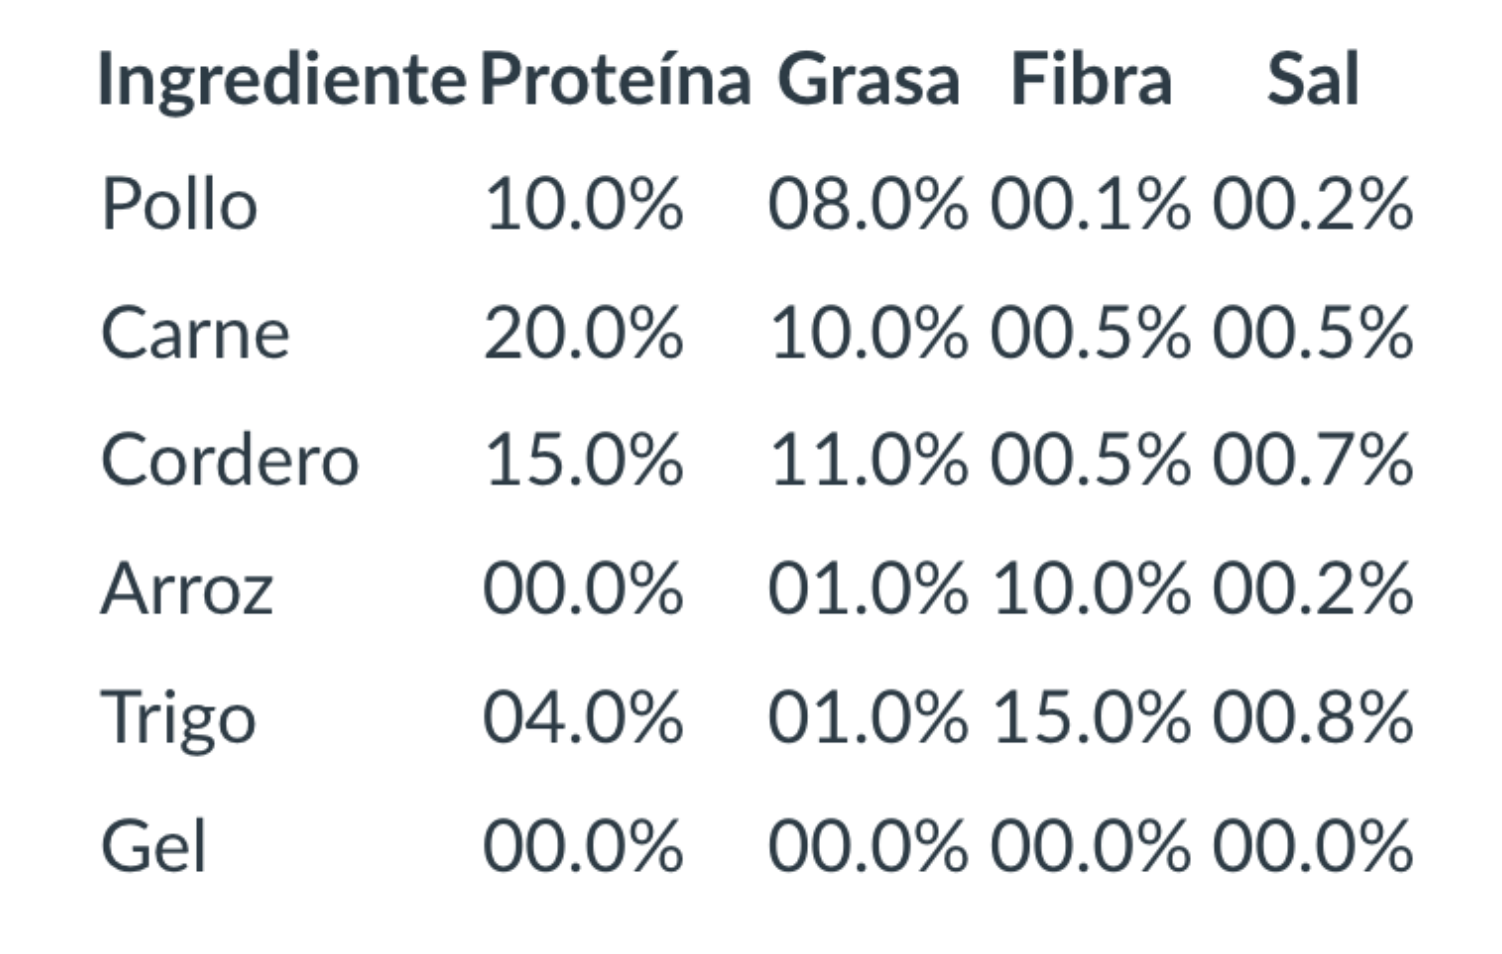

Los costos de cada producto son: 

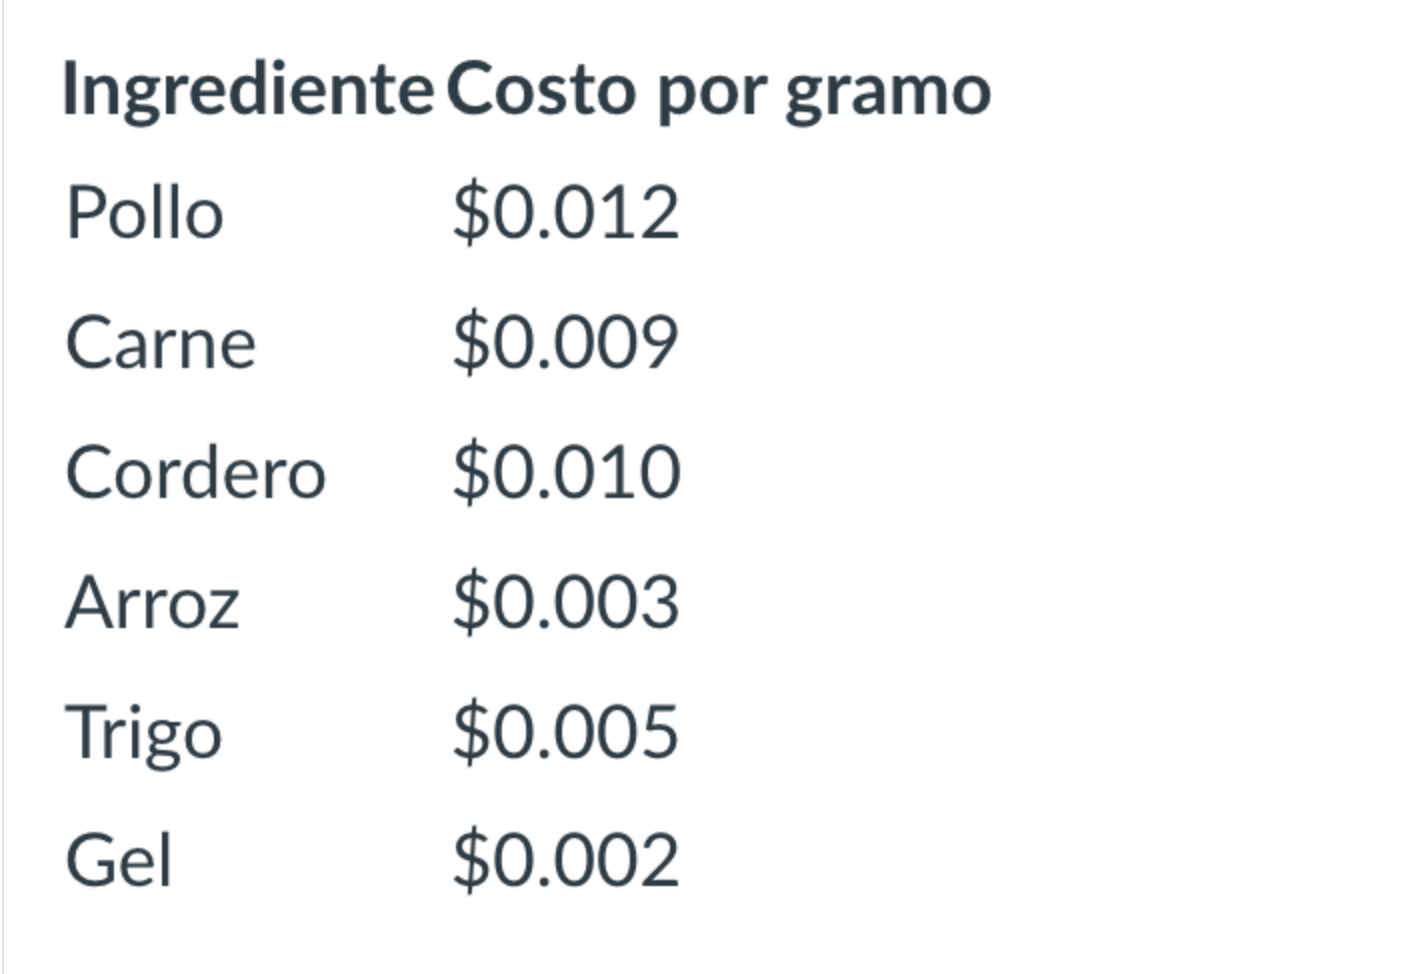

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total.

1) ¿Qué quiero hacer? minimizar el costo total
2) ¿Sobre qué puedo influir? Cantidad de gramos de pollo, carne, cordero, arroz, trigo y gel
3) Crear mi función de costo final:
$$f(p,ca,co,a,t,g) = 0.012p + 0.009ca + 0.010co + 0.003a + 0.005t + 0.002g$$
4) Identificar mis restricciones:
- proteína &ge; 9g
- grasa &ge; 7g
- fibra &le; 2.5g
- sal &le; 0.5g  

Pongo las restricciones en lenguaje matemático: 

PROTEÍNA 
$$0.1*p + 0.2*ca + 0.15*co + 0*a + 0.04*t + 0*g >= 9g$$ 
Podemos quitar los ceros: 
$$0.1*p + 0.2*ca + 0.15*co+ 0.04*t >= 9g$$ 

GRASAS
$$0.08*p + 0.1*ca + 0.11*co + 0.01*a + 0.01*t >= 7g$$ 

FIBRA 
$$0.001*p + 0.005*ca + 0.005*co + 0.1*a + 0.15*t <= 2.5g$$

SAL
$$0.002*p + 0.005*ca + 0.007*co + 0.002*a + 0.008*t <= 0.5$$ 

TOTALIDAD DE GRAMOS 
$$p+ca+co+a+t+g = 100$$ 

5. Necesito convertir el problema a uno de minimizacin:
$$-0.1p - 0.2ca - 0.15co -0.04t \leq -9g$$ 
$$-0.08p - 0.1ca - 0.11co - 0.01a - 0.01t \leq -7g$$ 
$$0.001p + 0.005ca + 0.005co + 0.1a + 0.15t \leq 2.5g$$
$$0.002p + 0.005ca + 0.007co + 0.002a + 0.008t \leq 0.5$$
#Puedo convertir mi restricción de igualdad a una de "menor que" ya que la gente no se podría enojar porque viniera más comida de gato en el paquete 
$$-p-ca-co-a-t-g \leq -100$$ 

Ahora en este recuadro resumo todo el problema: 

$$\min_{p,ca,co,a,t,g} 0.012p + 0.009ca + 0.010co + 0.003a + 0.005t + 0.002g$$
<div align ="center">s.t.
$$-0.1p - 0.2ca - 0.15co -0.04t \leq -9g$$ 
$$-0.08p - 0.1ca - 0.11co - 0.01a - 0.01t \leq -7g$$ 
$$0.001p + 0.005ca + 0.005co + 0.1a + 0.15t \leq 2.5g$$
$$0.002p + 0.005ca + 0.007co + 0.002a + 0.008t \leq 0.5$$ 
$$-p-ca-co-a-t-g \leq -100$$ 


In [98]:
import scipy.optimize as opt 
import numpy as np 
c= np.array([0.012,
             0.009,
             0.010,
             0.003,
             0.005,
             0.002,
             ])
#p,ca,co,a,t,g 
Aub= np.array([
    [-0.1 , -0.2,  -0.15,  0,    -0.04,  0],
    [-0.08, -0.1,  -0.11, -0.01, -0.01,  0],
    [ 0.001, 0.005, 0.005, 0.1,   0.15,  0],
    [ 0.002, 0.005, 0.007, 0.002, 0.008, 0],
    [-1,    -1,    -1,    -1,    -1,    -1],
])
#La matriz al parecer después de la última fila tmbn lleva coma afuera de los corchetes 
bub= ([
    -9,
    -7,
     2.5,
     0.5,
    -100,
])

sol=opt.linprog(c,Aub,bub)
sol 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 0.69
              x: [ 0.000e+00  7.000e+01  0.000e+00  0.000e+00  0.000e+00
                   3.000e+01]
            nit: 2
          lower:  residual: [ 0.000e+00  7.000e+01  0.000e+00  0.000e+00
                              0.000e+00  3.000e+01]
                 marginals: [ 4.400e-03  0.000e+00  3.000e-04  3.000e-04
                              2.300e-03  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 5.000e+00  0.000e+00  2.150e+00  1.500e-01
                              0.000e+00]
                 marginals: [-0.000e+00 -7.000e-02 -0.000e

In [102]:
sol.x 

array([ 0., 70.,  0.,  0.,  0., 30.])

In [105]:
Aub @ sol.x 
#Las deigualdades si inicialmente eran "mayor que" al final al interpretarlos tengo que cambiarles el signo no? 

array([ -14.  ,   -7.  ,    0.35,    0.35, -100.  ])

**Analizando los resultados de arriba:**   
**El costo total de al comida de gato producida es:** 0.69   
**Los gramos de pollo:** 0g   
**Los gramos de carne:** 70g  
**Los gramos de cordero:** 0g  
**Los gramos de arroz:** 0g    
**Los gramos de trig:** 0g   
**Los gramos de gel:** 30g   
**Los gramos de proteína son:** 14g  
**Los gramos de grasa:** 7g  
**Los gramos de fibra:** 0.35  
**Los gramos de sal:** 0.35   
**Los gramos totales en el empaque son:** 100g   

**Ejercicio 2** 

La Comisión Federal de Electricidad (CFE) dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas 1, 2 y 3 pueden satisfacer 75, 50 y 60 millones de kW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de 60, 45 y 60 millones de Kw al día respectivamente.

Los costos asociados al envío de suministro energético por cada millón de kW entre cada planta y cada ciudad son los registrados en la siguiente tabla.

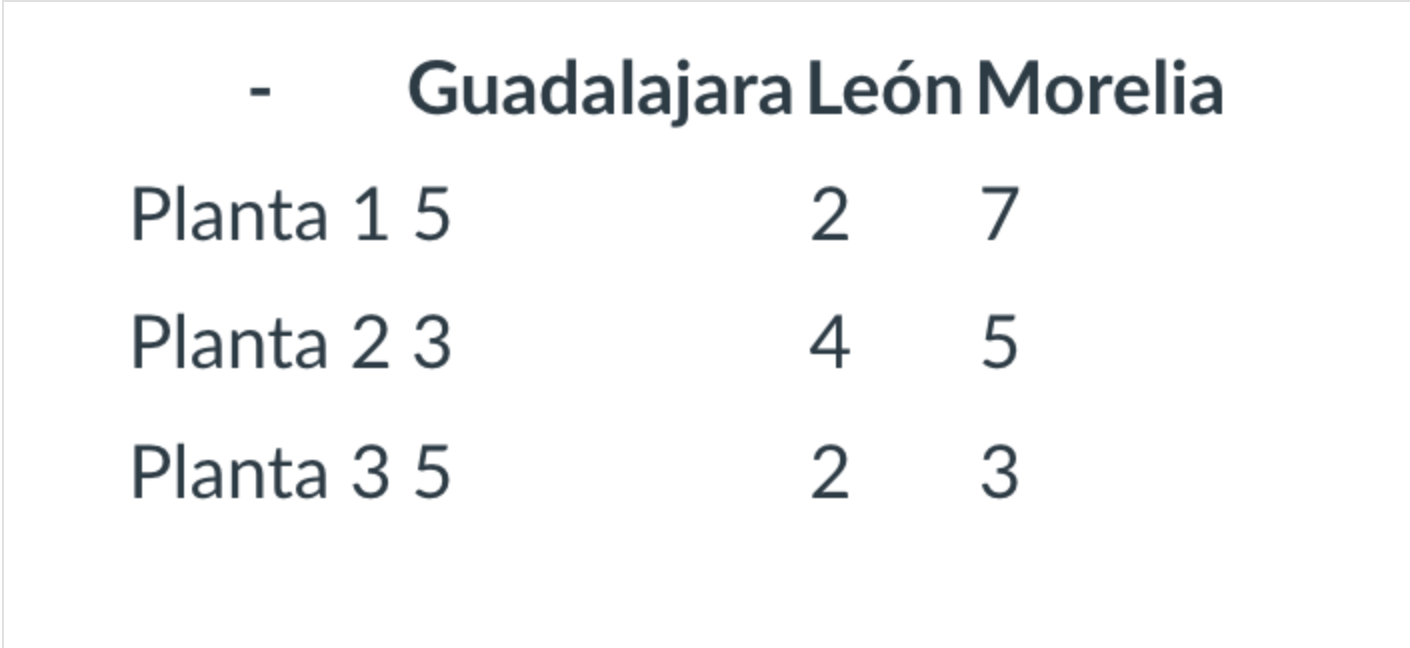

1) ¿Qué quiero hacer? Busco minimizar el costo en unidades de millón de KW 
2) ¿Sobre qué puedo influir? Sobre cuántos millones de Kw proporciona cada planta a cada ciudad 
3) Mi función de costo: 
$$f(G_1,L_1,M_1,G_2,L_2,M_2,G_3,L_3,M_3) = 5(G_1)+2(L_1)+7(M_1)+3(G_2)+4(L_2)+5(M_2)+5(G_3)+2(L_3)+3(M_3)$$
4) RESTRICCIONES
$$G_1+L_1+M_1 \leq75$$
$$G_2+L_2+M_2\leq50$$
$$G_3+L_3+M_3\leq60$$
$$G_1+G_2+G_3 \geq 60$$
$$L_1+L_2+L_3 \geq 45$$
$$M_1+M_2+M_3 \geq 60$$ 

5. Cambiando mi problema a uno de minimización:
$$-G_1-G_2-G_3 \leq -60$$
$$-L_1-L_2-L_3 \leq -45$$
$$-M_1-M_2-M_3 \leq -60$$ 

Ahora resumiendo todo el problema: 
$$\min_{G_1,L_1,M_1,G_2,L_2,M_2,G_3,L_3,M_3} 5(G_1)+2(L_1)+7(M_1)+3(G_2)+4(L_2)+5(M_2)+5(G_3)+2(L_3)+3(M_3)$$
<div align ="center">s.t.
$$G_1+L_1+M_1 \leq75$$
$$G_2+L_2+M_2\leq50$$
$$G_3+L_3+M_3\leq60$$
$$-G_1-G_2-G_3 \leq -60$$
$$-L_1-L_2-L_3 \leq -45$$
$$-M_1-M_2-M_3 \leq -60$$ 

In [125]:
import scipy.optimize as opt 
import numpy as np 
c2= np.array([5,
             2,
             7,
             3,
             4,
             5,
             5,
             2,
             3,
             ])
#G_1,L_1,M_1,G_2,L_2,M_2,G_3,L_3,M_3 
Aub2= np.array([
    [ 1 , 1, 1,  0, 0, 0, 0, 0, 0],
    [ 0,  0, 0,  1, 1, 1, 0, 0, 0],
    [ 0,  0, 0,  0, 0, 0, 1, 1, 1],
    [-1,  0, 0, -1, 0, 0,-1, 0, 0],
    [ 0, -1, 0,  0,-1, 0, 0,-1, 0],
    [ 0,  0,-1,  0, 0,-1, 0, 0,-1]
])
#La matriz al parecer después de la última fila tmbn lleva coma afuera de los corchetes 
bub2= ([
    75,
    50,
    60,
    -60,
    -45,
    -60
])

sol2=opt.linprog(c2,Aub2,bub2)
sol2  #Si haces varios problemas con linprog no uses siempre las mismas variables "c", "Aub" y así pq sino te va a segir dano las respuestas del primer problema 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 470.0
              x: [ 1.000e+01  4.500e+01  0.000e+00  5.000e+01  0.000e+00
                   0.000e+00  0.000e+00  0.000e+00  6.000e+01]
            nit: 4
          lower:  residual: [ 1.000e+01  4.500e+01  0.000e+00  5.000e+01
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              6.000e+01]
                 marginals: [ 0.000e+00  0.000e+00  4.000e+00  0.000e+00
                              4.000e+00  4.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.0

In [128]:
sol2.x 

array([10., 45.,  0., 50.,  0.,  0.,  0.,  0., 60.])

In [131]:
Aub2 @ sol2.x 

array([ 55.,  50.,  60., -60., -45., -60.])

Analizando los datos anteriores:   
**El costo mínimo cumpliendo con el requerimiento de la demanda eléctrica es de:** 470   
**kW mandados por la planta 1 a Guadalajara:** 10  
**kW mandados por la planta 1 a León:** 45  
**kW mandados por la planta 1 a Morelia:** 0  
**kW mandados por la planta 2 a Guadalajara:** 50  
**kW mandados por la planta 2 a León:** 0  
**kW mandados por la planta 2 a Morelia:** 0  
**kW mandados por la planta 3 a Guadalajara:** 0  
**kW mandados por la planta 3 a León:** 0  
**kW mandados por la planta 3 a Morelia:** 60  
**kW procudidos al día por la planta 1:** 55  
**kW procudidos al día por la planta 2:** 50  
**kW procudidos al día por la planta 3:** 60  
**kW totales mandados a Guadalajara:** 60  
**kW totales mandados a León:** 45  
**kW totales mandados a Morelia:** 60   

# <div align ="center"> A06-PROGRAMACIÓN LINEAL

Usa los 5 pasos vistos en clase para plantear adecuadamente el siguiente ejercicio. Después, utiliza linprog para resolverlo. 

**Ejercicio 1** 

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

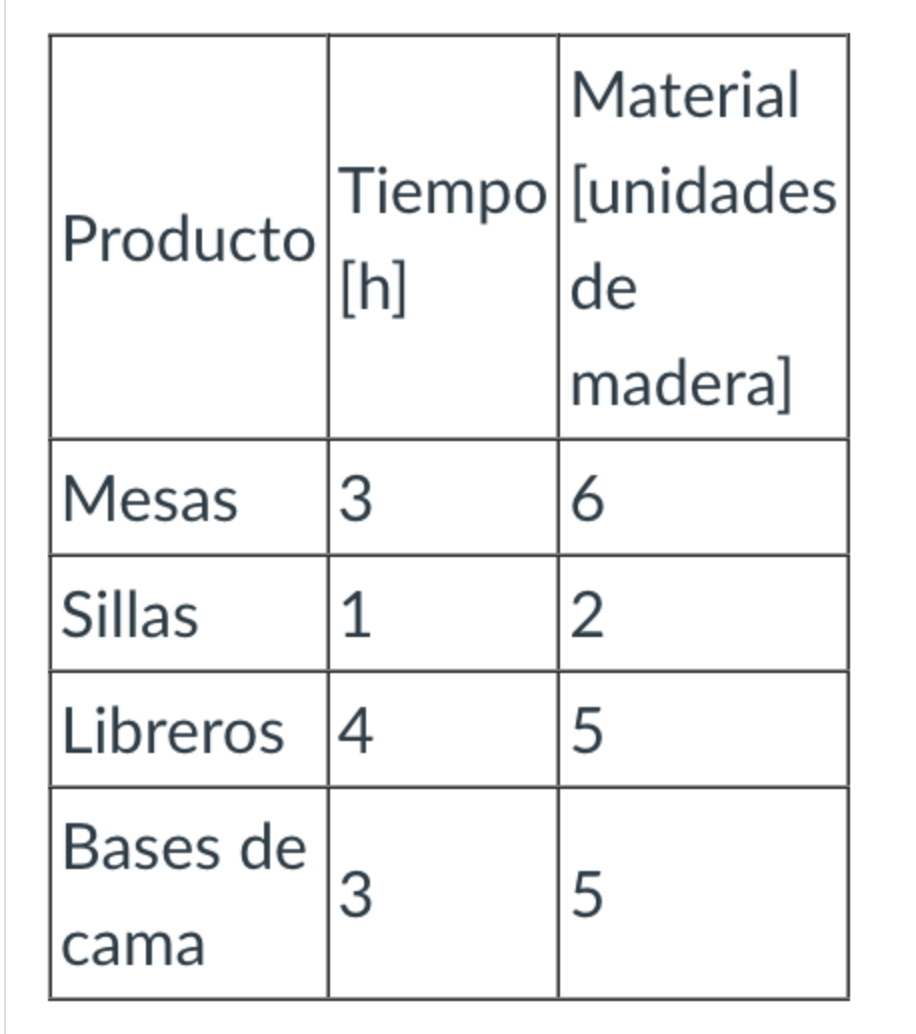

Las mesas se venden en 9000, las sillas en 3000, los libreros en 10000, y las bases de cama en 9000. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?  
¿Cuánto material se usa?  
¿Cuál se el ingreso total si se vende todo lo fabricado?  

1. ¿Qué quiero hacer?
Quiero maximizar la ganancia
2. ¿Sobre qué puedo influir? sobre qué objetos se construyen y sobre quién los construye
3. Crear mi función de costo:
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= 9000m1 + 9000m2 + 3000s1 + 3000s2 + 10000l1 + 10000l2 + 9000b1 + 9000b2$$
4. RESTRICCIONES
$$3m1 + s1 + 4l1 + 3b1 <=40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2<=40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 <=100$$
5. Cuidar que sea un problema de optimización de min
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$
Como las restricciones ya eran "menor o igual que" no hubo necesidad de alterarlas 

Ahora resumiendo todo el problema: 
$$\min_{s1,s2,m1,m2,l1,l2,b1,b2} -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$ 
<div align ="center">s.t.
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$


In [157]:
import scipy.optimize as opt 
import numpy as np 
c= np.array([-9000,
             -9000,
             -3000,
             -3000,
             -10000,
             -10000,
             -9000,
             -9000,
             ])
#m1,m2,s1,s2,l1,l2,b1,b2 
Aub= np.array([
    [ 3,  0,  1,  0,  4,  0,  3,  0],
    [ 0,  4.5,  0,  1.5,  0,  6,  0,  4.5],
    [ 6,  7.2,  2,  2.4,  5,  6,  5,  6],
])

bub= ([
    40,
    40,
    100,
])

sol2=opt.linprog(c,Aub,bub,integrality=1)
sol2 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -176000.0
              x: [ 0.000e+00  0.000e+00  1.000e+00 -9.474e-15  9.000e+00
                   2.000e+00  1.000e+00  6.000e+00]
            nit: -1
          lower:  residual: [ 0.000e+00  0.000e+00  1.000e+00 -9.474e-15
                              9.000e+00  2.000e+00  1.000e+00  6.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00  0.00

In [160]:
#la parte de x representa los valores de tus variables en el mismo orden en que las pusiste
#Para llamarlo es con sol.x 

#Para conocer el valor de tus restricciones debes multiplicar la matriz Aub por la matriz de soluciones x 
#Multi de matrices es con @ 

In [163]:
Aub @ sol2.x #No deberían salir sólo 3 resultados? pq salen 5? checa eso 

array([ 40.,  39., 100.])

interpretando los resultados de arriba: 

**Para maximizar su ganancia, a la carpintería local le conviene construir durante una semana:**   
0 mesas del carpintero experto  
0 mesas del carpinter aprendíz  
1 silla del carpintero experto  
-9.474e-15 sillas del carpintero aprendíz (whatttt como que sillas negativas...checa cómo se interpreta esto)   
9 libreros del carpintero experto   
2 libreros del carpintero aprendíz   
1 base de cama del carpintero experto   
6 bases de cama del carpintero aprendíz   
**El carpintero experto trabaja** 40 horas   
**El carpintero aprendíz trabaja** 39 horas   
**Se usa el 100% del material**   
**La ganancia total** es de 176,000   


**Ejercicio 2**


La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

¿Se puede cumplir la orden?  
Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?  
¿Cuántas horas trabaja cada quién?  
¿Cuánto material se usa?  
¿Cuál es el nuevo ingreso total?  


1. ¿Qué quiero hacer?
Nuevamente quiero maximizar la ganancia
2. ¿Sobre qué puedo influir? sobre qué objetos se construyen y sobre quién los construye cumpliendo el mínimo de la orden de 3 mesas y 18 sillas. 
3. Crear mi función de costo:
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= 9000m1 + 9000m2 + 3000s1 + 3000s2 + 10000l1 + 10000l2 + 9000b1 + 9000b2$$
4. RESTRICCIONES
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$
No puedo especificar de una la cantidad de mesas como 3 y la cantidad de sillas como 18 porque puede que para maximizar el resto del material, convenga construir más de esos objetos. Por lo que la cantidad de mesas y sillas deben seguir siendo variables. Entonces puedo poner estos nuevos datos como otras restricciones para asegurarse de que al menos el mínimo de mesas y sillas se cumpla:
$$m1 + m2 \geq 3$$
$$s1 + s2 \geq 18$$ 
6. Cuidar que sea un problema de optimización de min
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$
En este caso mis últimas 2 restricciones son "mayor o igual que", por lo que debo cambiarlas de signo para hacerlas "menor o igual que":
$$ -m1 - m2 \leq -3 $$
$$ -s1 - s2 \leq -18 $$ 

Ahora resumiendo todo el problema: 
$$\min_{s1,s2,m1,m2,l1,l2,b1,b2} -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$ 
<div align ="center">s.t.
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$
$$ -m1 - m2 \leq -3 $$
$$ -s1 - s2 \leq -18 $$ 

In [181]:
import scipy.optimize as opt 
import numpy as np 
c= np.array([-9000,
             -9000,
             -3000,
             -3000,
             -10000,
             -10000,
             -9000,
             -9000,
             ])
#m1,m2,s1,s2,l1,l2,b1,b2 
Aub= np.array([
    [ 3,  0,    1,  0,    4,  0,  3,  0],
    [ 0,  4.5,  0,  1.5,  0,  6,  0,  4.5],
    [ 6,  7.2,  2,  2.4,  5,  6,  5,  6],
    [-1, -1,    0,  0,    0,  0,  0,  0],
    [ 0,  0,   -1, -1,    0,  0,  0,  0],
])
#La matriz al parecer después de la última fila tmbn lleva coma afuera de los corchetes 
bub= ([
    40,
    40,
    100,
    -3,
    -18,
])

sol_pedido=opt.linprog(c,Aub,bub,integrality=1)
sol_pedido 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -161000.0
              x: [ 3.000e+00  0.000e+00  1.800e+01  0.000e+00  3.000e+00
                   5.000e+00  0.000e+00  0.000e+00]
            nit: -1
          lower:  residual: [ 3.000e+00  0.000e+00  1.800e+01  0.000e+00
                              3.000e+00  5.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+00  1.000e+01  1.00

In [184]:
#Como minimizamos la función, en una gráfica se obersva que una función maximizada está en el mismo punto que minimizada pero con signo opuesto. Por lo que el precio final aquí es el valor pero positivo 
sol_pedido.fun * -1 

161000.0

In [187]:
Aub @ sol_pedido.x 

array([ 39.,  30.,  99.,  -3., -18.])

Interpretando los resultados: 
Sí se puede cumplir la orden  
Se deben construir: 
3 mesas del carpintero experto  
0 mesas del carpinter aprendíz  
18 silla del carpintero experto  
0 sillas del carpintero aprendíz 
3 libreros del carpintero experto   
5 libreros del carpintero aprendíz   
0 bases de cama del carpintero experto   
0 bases de cama del carpintero aprendíz   
**El carpintero experto trabaja** 39 horas   
**El carpintero aprendíz trabaja** 30 horas   
**Se usa el 99% del material**   
**La ganancia total** es de 161,000   